In [129]:
from IPython.display import display
import pandas as pd
import requests
import os

In [130]:
import matplotlib.pyplot as plt
from matplotlib.image import imread
from PIL import Image

# Предварительно загружаем _iris.csv_ файл c <https://www.inaturalist.org>

In [131]:
data = pd.read_csv('iris.csv', index_col=False)
print(data.shape)
display(data)

(119297, 3)


,id,image_url,scientific_name
0,260,https://inaturalist-open-data.s3.amazonaws.com...,Iris haynei
1,2211,https://inaturalist-open-data.s3.amazonaws.com...,Iris douglasiana
2,2232,https://static.inaturalist.org/photos/2825/med...,Iris douglasiana
3,2233,https://inaturalist-open-data.s3.amazonaws.com...,Iris douglasiana
4,2579,https://inaturalist-open-data.s3.amazonaws.com...,Iris pseudacorus
...,...,...,...
119292,194463072,https://static.inaturalist.org/photos/34182853...,Iris versicolor
119293,194466298,https://static.inaturalist.org/photos/34183306...,Iris foetidissima
119294,194479068,https://inaturalist-open-data.s3.amazonaws.com...,Iris pseudacorus
119295,194480462,https://inaturalist-open-data.s3.amazonaws.com...,Iris missouriensis


# Возьмём те типы ирисов у которых доступно от 1000 до 1500 изображений. 
P.s. Я программирую на ноутбуке без дискретной видеокарты.

In [132]:
size = data.groupby('scientific_name').size()
good_classes = []
for i, s in enumerate(size): 
    if 1000 < s < 1500:
        good_classes.append(size.keys()[i])
print(f"{len(good_classes)} classes will be explored: {good_classes}")

4 classes will be explored: ['Iris aphylla', 'Iris fernaldii', 'Iris hartwegii', 'Iris lacustris']


In [133]:
new_data = data[data['scientific_name'].isin(good_classes)]
print(new_data.shape)
display(new_data)

(4405, 3)


,id,image_url,scientific_name
11,7768,https://inaturalist-open-data.s3.amazonaws.com...,Iris hartwegii
61,63710,https://inaturalist-open-data.s3.amazonaws.com...,Iris fernaldii
68,68996,https://inaturalist-open-data.s3.amazonaws.com...,Iris fernaldii
89,80565,https://static.inaturalist.org/photos/118687/m...,Iris fernaldii
134,205767,https://static.inaturalist.org/photos/261241/m...,Iris lacustris
...,...,...,...
118722,192451006,https://inaturalist-open-data.s3.amazonaws.com...,Iris aphylla
118935,193137763,https://inaturalist-open-data.s3.amazonaws.com...,Iris aphylla
119118,193879648,https://inaturalist-open-data.s3.amazonaws.com...,Iris aphylla
119120,193880634,https://inaturalist-open-data.s3.amazonaws.com...,Iris aphylla


# Создадим папки с для разных scientific_name

In [134]:
def create_directory(directory_path, mother_dir):
    if not os.path.exists(f'{mother_dir}/{directory_path}'):
        os.makedirs(f'{mother_dir}/{directory_path}')
    else:
        pass

image_dir = 'data'
for d in good_classes:
    create_directory(d, image_dir)

# Сохраним изображения в соответствущие папки scientific_name

In [135]:
for index, row in new_data.iterrows():
    image_url = row['image_url']
    scientific_name = row['scientific_name']

    image_path = f'{image_dir}/{scientific_name}/image_{index}.jpg'

    if not os.path.exists(image_path):
        response = requests.get(image_url)
        with open(image_path, 'wb') as f:
            f.write(response.content)
    else:
        """ Условие добавлено, чтобы если произойдёт прерывание программы вам не пришлось заново скачивать изображения с интернета. """
        pass

# Посмотрим какие виды мы исследуем

In [136]:
class FilesWork:
    def __init__(self, data_dir):
        self.data_dir = data_dir
        self.sub_folders = [sf.path for sf in os.scandir(data_dir) if sf.is_dir()]
        
    def show_data(self, data_index):
        for sub_folder in self.sub_folders:
            image_files = [f.path for f in os.scandir(sub_folder) if f.is_file() and f.name.endswith(('.png', '.jpg', '.jpeg'))]
            first_image_path = image_files[data_index]
            image = imread(first_image_path)
        
            plt.imshow(image)
            plt.title(os.path.basename(sub_folder))
            plt.show()

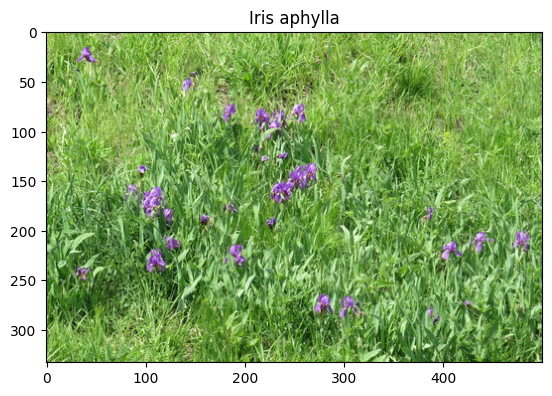

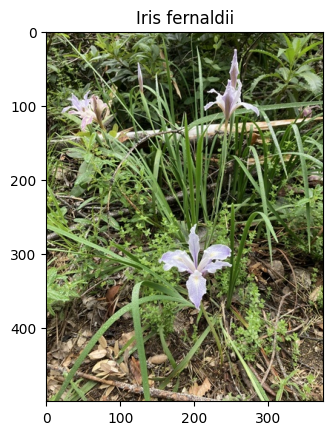

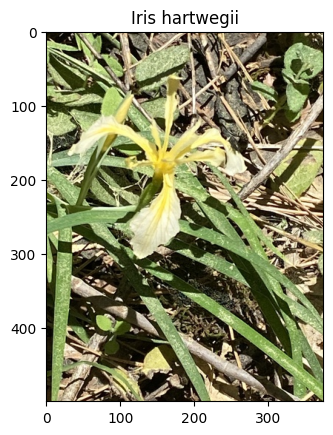

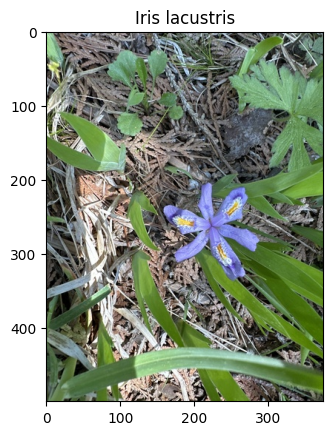

In [137]:
a = FilesWork(image_dir)
a.show_data(data_index=10)

# Приведём все изображения к одной форме и размеру, стараясь максимально сохранить информативность

In [138]:
image_dir_2 = 'data_2'
for d in good_classes:
    create_directory(d, image_dir_2)

In [141]:
target_size = (150, 150)  # Задаем целевой размер

for sub_folder in a.sub_folders:
    sub_folder_2 = image_dir_2 + '\\' + sub_folder.split('\\')[1]
    for filename in os.listdir(sub_folder):
        image_path = os.path.join(sub_folder, filename)
        image_path_2 = os.path.join(sub_folder_2, filename)
        # Получаем размеры изображения
        img = Image.open(image_path)
        width, height = img.size
        
        if not os.path.exists(image_path_2) and (width, height) != target_size:
            # Вычисляем координаты для обрезки центральной части
            min_side = min(width, height)
            left = (width -min_side) // 2
            top = (height - min_side) // 2
            right = (width + min_side) // 2
            bottom = (height + min_side) // 2
            # Обрезаем центральную часть
            img_cropped = img.crop((left, top, right, bottom))
            # Изменяем размер обрезанного изображения
            img_resized = img_cropped.resize((150, 150))
            # Сохраняем
            img_resized.save(image_path, format='PNG')
        else:
            pass

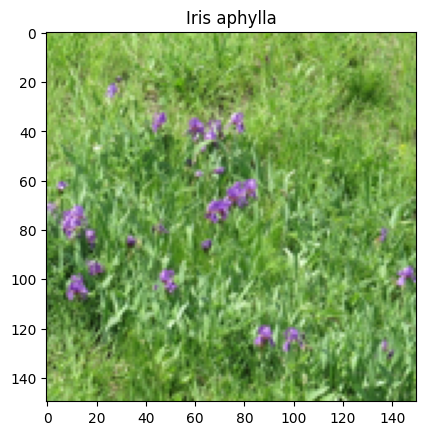

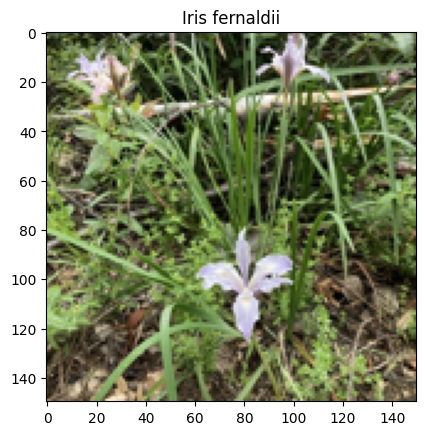

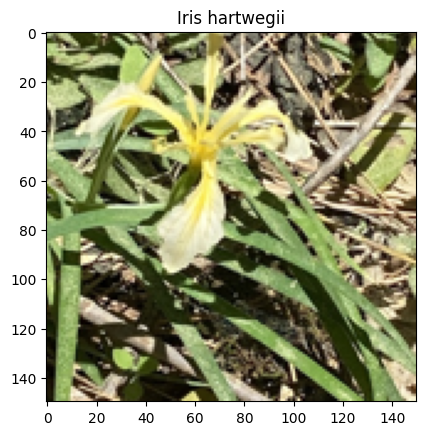

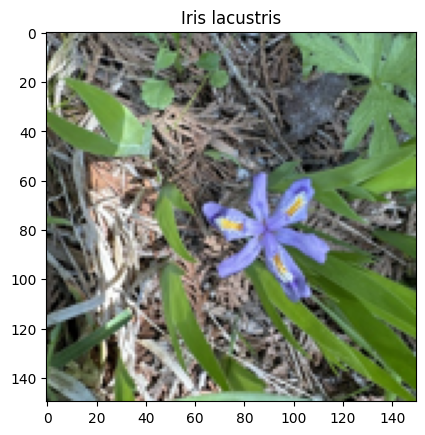

In [140]:
b = FilesWork(data_dir=image_dir_2)
b.show_data(data_index=10)